<a href="https://colab.research.google.com/github/KazakDK/ml_car_price_prediction_service/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказание стоимости автомобиля

## Постановка задачи и первое знакомство с датафреймом

Задача:
- Предсказать стоимость автомобиля по его признакам

Этапы решения нашей задачи:
- Первое знакомство с датафреймом
- Просмотр общей информации о датасете (Размер, типы данных)
- Поиск и удаление явных дубликатов
- Работа с пропусками в данных
- Обработка каждой колонки с пропусками

In [183]:
import pandas as pd

### Первый взгляд на датафрейм

Загрузим наш датафрейм и посмотрим что он из себя представляет

In [184]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Учеба\Мои проекты\ml_car_price_prediction_service\cars.csv')

In [185]:
print(df.shape)
df.head()

(6999, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


### Типы данных

Перед нами датафрейм на 6999 объектов с 13 признаками у каждого объекта

Опишем все представленные признаки:

|Признак|Описание|
|-------|--------|
|name|Модель автомобиля|
|year|Год выпуска с завода-изготовителя|
|selling_price|ценв продажи|
|km_driven|Пробег на дату продажи|
|fuel|Вид топлива|
|seller_type|Тип продавца|
|transmission|Вид трансмиссии|
|owner|Хозяин по счету|
|milage|Расход топлива на км|
|engine|Объем двигателя|
|max_power|Максимальная мощность|
|torque|Крутящий момент|
|seats|Количество сидений|

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [187]:
df.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [188]:
df.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


### Поиск и удаление явных дуликатов

In [189]:
print(df[df.duplicated(keep=False)].sort_values(by='name').shape)
df[df.duplicated(keep=False)].sort_values(by='name').head(10)

(1478, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
4485,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0


Видим что в нашем датафрейме есть очень много явных дубликатов

Явные дубликаты это строки(объекты) которые абсолютно идентичны друг другу

In [190]:
df.drop_duplicates(inplace=True)
df.shape

(6014, 13)

Выбросили из нашего датафрейма дубликаты и теперь видим, что наш датафрейм уменьшился на количество дубликатов

### Работа с пропусками в данных

Для начала найдем колонки с пропусками в нашем датафрейме

In [191]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [192]:
df.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [193]:
pd.DataFrame(df.isna().mean()*100,columns=['%']).style.set_precision(1).background_gradient('coolwarm')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8224\3768466165.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pd.DataFrame(df.isna().mean()*100,columns=['%']).style.set_precision(1).background_gradient('coolwarm')


,%
name,0.0
year,0.0
selling_price,0.0
km_driven,0.0
fuel,0.0
seller_type,0.0
transmission,0.0
owner,0.0
mileage,3.2
engine,3.2


In [194]:
nans = df.columns[df.isna().any()].to_list()
nans

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [195]:
df[df.isna().sum(axis=1) > 4]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
12,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
69,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
78,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
107,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6675,Hyundai Santro Xing XG,2004,70000,70000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
6889,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
6901,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
6949,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


Если посмотреть на пропуски в нашем датафрейме, то можно увидеть, что есть объекты с более чем 4 пропусками в признаках

Если заморочиться, то можно было бы приджоинить в эти пропуски данные из других строк с совпадающими названиями автомобилей, но я решил не заморачиваться ради 191 строки

In [196]:
df.dropna(inplace=True)

### Обработка каждой колонки с пропусками

Будем одновременно заполнять пропуски и приводить к нужному виду тип данных колонки

#### Расход топлива

In [197]:
df['mileage'].head(10)

0     23.4 kmpl
1    21.14 kmpl
2     23.0 kmpl
3     16.1 kmpl
4    20.14 kmpl
5    17.3 km/kg
6     16.1 kmpl
7    23.59 kmpl
8     20.0 kmpl
9    19.01 kmpl
Name: mileage, dtype: object

In [198]:
df['mileage'].dtype # Тип данных - объект

dtype('O')

Тип этого признака объект, но мы видим что нам нужно вытащить число с расходом топлива и по хорошему обработать единицу измерения

In [199]:
df['mileage'].str.split(expand=True).head() # Поделили по пробелу наш объект

,0,1
0,23.4,kmpl
1,21.14,kmpl
2,23.0,kmpl
3,16.1,kmpl
4,20.14,kmpl


In [200]:
fuel_consumption = df['mileage'].str.split(expand=True)
fuel_consumption.columns = ['consumption','consumption_metric'] # Переименовали колонки

In [201]:
df = df.join(fuel_consumption) # Объединили с нашим датафреймом по индексу

In [202]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,consumption,consumption_metric
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4,kmpl
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,kmpl
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0,kmpl


In [203]:
df.drop(columns='mileage',inplace=True) # Убрали нашу старую колонку

In [204]:
df['consumption'] = df['consumption'].astype(float) # Переведем к формату чисел float

In [205]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,consumption,consumption_metric
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,kmpl
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,kmpl
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,kmpl


In [206]:
df['consumption_metric'].unique()

array(['kmpl', 'km/kg'], dtype=object)

Видим что единицы измерения расхода разные:
- километров на литр
- километров на килограмм
Километр на килограм это единица расхода для автомобилей на газе стоит подумать как нормировать эту единицу измерения, или оставить как есть

In [207]:
df.groupby('consumption_metric').agg({'consumption' : ['mean','median','count']})

consumption             
                          mean median count
consumption_metric                         
km/kg                22.073377  21.94    77
kmpl                 19.443818  19.40  5746

Кажется, что средние и медианные не сильно различаются

Нам нужно понять, равнозначные ли это подходы к определению расхода или они не сопоставимы

Можно проверить стат методом, но мы просто выбросим эту колонку

In [208]:
df.drop(columns='consumption_metric', inplace=True)

#### Объем двигателя

In [209]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,consumption
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00


In [210]:
df['engine'].describe()

count        5823
unique        120
top       1248 CC
freq          795
Name: engine, dtype: object

Видим что это тоже объект и нам так же нужно вытащить объем двигателя и единицу измерения

In [211]:
engine_volume = df['engine'].str.split(expand=True)
engine_volume.columns = ['volume','volume_metric'] # Переименовали колонки
df = df.join(engine_volume) # Объединили с нашим датафреймом по индексу
df['volume'] = df['volume'].astype(float) # Переведем к формату чисел

In [212]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,consumption,volume,volume_metric
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0,CC
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,CC
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,CC


In [213]:
df['volume_metric'].unique()

array(['CC'], dtype=object)

Единица измерения объема двигателя у всех автомобилей одинаковая, так что просто выбросим этот признак

In [214]:
df.drop(columns='volume_metric',inplace=True)
df.drop(columns='engine',inplace=True)

#### Крутящий момент

In [215]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,torque,seats,consumption,volume
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0


In [216]:
df['torque'].describe()

count               5823
unique               419
top       190Nm@ 2000rpm
freq                 417
Name: torque, dtype: object

Cнова видим тип данных объект который мы будем обрабатывать

В строках где есть единица измерения kgm мы должны привести ее к Nm

В интернете нашли, что нужно умножить значение в kgm на 9,80665

Ниже реализуем наше решение

In [217]:
df.loc[df['torque'].str.contains('kgm'),'torque']

2        22.4 kgm at 1750-2750rpm
3           11.5@ 4,500(kgm@ rpm)
5            7.8@ 4,500(kgm@ rpm)
15       22.4 kgm at 1750-2750rpm
29                6.1kgm@ 3000rpm
                  ...            
6961        16.3@ 2,000(kgm@ rpm)
6977        13.5@ 4,800(kgm@ rpm)
6978             11.3kgm@ 4700rpm
6985    20.4@ 1400-3400(kgm@ rpm)
6995    24@ 1,900-2,750(kgm@ rpm)
Name: torque, Length: 407, dtype: object

In [218]:
def get_num_kgm(kgm_string):
  res = ''
  for char in kgm_string:
    if char.isdigit():
      res += char
    elif char == '.':
      res += char
    elif char == ',':
      res += char
    else:
      return res
  return res

In [219]:
df.loc[df['torque'].str.contains('kgm'),'torque'] = round(df.loc[df['torque'].str.contains('kgm',na=False),'torque'].apply(get_num_kgm).astype(float) * 9.80665)

In [220]:
df.loc[df['torque'].str.contains('kgm',na=False),'torque']

Series([], Name: torque, dtype: object)

In [221]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,torque,seats,consumption,volume
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,90 bhp,220.0,5.0,23.00,1396.0


Видим что мы успешно перевели в верную единицу измерения строки которые содержали единицу измерения kgm

Дальше будем обрабатывать оставшиеся ячейки с Nm

Идея проста:
- Проверяем, что каждый символ это число, точка или запятая
- Добавляем к нашему результату
- Если символ не число, точка или запятая, то прерываем функцию и выводим результат

In [222]:
def get_numeric(your_string):
  digits = ''
  for char in your_string:
    if char.isdigit():
      digits += char
    elif char == '.':
      digits += char
    elif char == ',':
      digits += char
    else:
      return digits
  return digits

In [223]:
my_string = '50.25 string 44.50'
get_numeric(my_string)

'50.25'

In [224]:
df['torque'] = df['torque'].astype(str).apply(get_numeric).astype(float)

In [225]:
df['torque'].describe()

count    5823.000000
mean      175.497939
std       117.824185
min        14.900000
25%       110.000000
50%       160.000000
75%       200.000000
max      3727.000000
Name: torque, dtype: float64

In [226]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,torque,seats,consumption,volume
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,74 bhp,190.0,5.0,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52 bhp,250.0,5.0,21.14,1498.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,90 bhp,220.0,5.0,23.00,1396.0


#### Мощность двигателя

In [227]:
df['max_power'].describe()

count       5823
unique       314
top       74 bhp
freq         282
Name: max_power, dtype: object

In [228]:
hourse_power = df['max_power'].str.split(expand=True)
hourse_power.columns = ['power','power_metric'] # Переименовали колонки
df = df.join(hourse_power) # Объединили с нашим датафреймом по индексу
df['power'] = df['power'].astype(float) # Переведем к формату чисел

In [229]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,torque,seats,consumption,volume,power,power_metric
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,74 bhp,190.00,5.0,23.40,1248.0,74.00,bhp
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52 bhp,250.00,5.0,21.14,1498.0,103.52,bhp
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,90 bhp,220.00,5.0,23.00,1396.0,90.00,bhp
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,88.2 bhp,113.00,5.0,16.10,1298.0,88.20,bhp
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,81.86 bhp,113.75,5.0,20.14,1197.0,81.86,bhp


In [230]:
df['power_metric'].unique()

array(['bhp'], dtype=object)

In [231]:
df.drop(columns='power_metric',inplace=True)
df.drop(columns='max_power',inplace=True)

Как и раньше разбили нашу строку по пробелу, добавили получившиеся колонки к основному датафрейму и выбросили единицу измерения мощности автомобиля т.к. она имеет только одно значение

In [232]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,consumption,volume,power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190.00,5.0,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250.00,5.0,21.14,1498.0,103.52
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,220.00,5.0,23.00,1396.0,90.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,113.00,5.0,16.10,1298.0,88.20
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,113.75,5.0,20.14,1197.0,81.86


#### Количество владельцев

Будем переводить количество владельцев в числовое значение

Этот признак категориальный и явно порядковый, поэтому закодируем его числами от 0 до 4

In [233]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [234]:
df['owner'] = df['owner'].map({'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4})

In [235]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,consumption,volume,power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,190.00,5.0,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,1,250.00,5.0,21.14,1498.0,103.52
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,220.00,5.0,23.00,1396.0,90.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,113.00,5.0,16.10,1298.0,88.20
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,0,113.75,5.0,20.14,1197.0,81.86


#### Трансмиссия

Есть 2 вида трансмиссий, автоматическая и механическая, мапом заменим их на 0 и единицу

In [236]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [237]:
df['transmission'] = df['transmission'].map({'Manual':0,'Automatic':1})

In [238]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,consumption,volume,power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,0,0,190.00,5.0,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,0,1,250.00,5.0,21.14,1498.0,103.52
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,0,0,220.00,5.0,23.00,1396.0,90.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,0,0,113.00,5.0,16.10,1298.0,88.20
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,0,0,113.75,5.0,20.14,1197.0,81.86


#### Вид топлива

In [239]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

У вида топлива нет порядка, поэтому числами закодировать его мы не сможем

#### Тип продавца

In [240]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

В типе продавца наверное можно определить порядок, но это не очевидно

Просто оставим как есть

#### Пробег

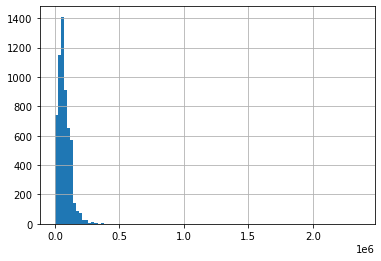

In [241]:
df['km_driven'].hist(bins=100);

In [242]:
df['km_driven'].max()

2360457

Такое ощущение, что все что более 500 тысяч километров - выбросы

Просто удалим все что более 500 тыс км

In [243]:
df = df[df['km_driven'] < 500000]

#### Стоимость автомобиля

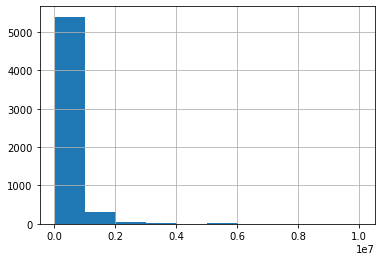

In [244]:
df['selling_price'].hist();

In [245]:
df[df['selling_price'] > 6_000_000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,consumption,volume,power
151,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,1,0,640.0,4.0,42.00,1969.0,400.00
2532,BMW X7 xDrive 30d DPE,2020,7200000,5000,Diesel,Individual,1,0,620.0,7.0,13.38,2993.0,265.00
4230,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,1,4,320.0,5.0,15.26,1798.0,187.74
4232,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,1,4,320.0,5.0,15.26,1798.0,187.74


Видно что большиство значений лежат до 6 млн, если посмотреть на автомобили, которые стоят более 6 млн, то они не особо похожи на выбросы

Есть только один автомобиль вольво который стоит 10 млн

Мне кажется что это выброс и его нужно удалить

In [246]:
df = df[df['selling_price'] < 8_000_000]

Переведем стоимость автомобиля в целое число чтобы мжно было считать логарифм

In [247]:
df['selling_price'] = df['selling_price'].astype(int)

#### Год выпуска автомобиля

In [248]:
df['year'].describe()

count    5817.000000
mean     2013.651195
std         3.886794
min      1994.000000
25%      2011.000000
50%      2014.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

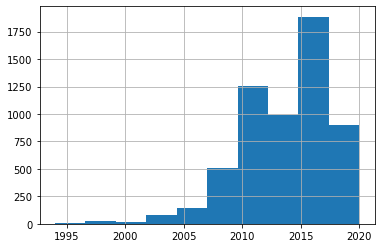

In [249]:
df['year'].hist();

В году выпуска нет выбросов, но тип года дробное число, хотя знаения все целочисленные

Поменяяем формат данных

In [250]:
df['year'] = df['year'].astype(int)

#### Название автомобиля

In [251]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,consumption,volume,power
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,0,0,190.00,5.0,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,0,1,250.00,5.0,21.14,1498.0,103.52
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,0,0,220.00,5.0,23.00,1396.0,90.00
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,0,0,113.00,5.0,16.10,1298.0,88.20
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,0,0,113.75,5.0,20.14,1197.0,81.86


In [252]:
df['name'].str.split(n=2,expand=True)

,0,1,2
0,Maruti,Swift,Dzire VDI
1,Skoda,Rapid,1.5 TDI Ambition
2,Hyundai,i20,Sportz Diesel
3,Maruti,Swift,VXI BSIII
4,Hyundai,Xcent,1.2 VTVT E Plus
...,...,...,...
6992,Hyundai,Santro,Xing GLS
6993,Maruti,Wagon,R VXI BS IV with ABS
6994,Hyundai,i20,Magna
6995,Hyundai,Verna,CRDi SX


In [253]:
name = df['name'].str.split(n=2, expand=True)
name.columns = ['brand','model','del'] # Переименовали колонки
df = df.join(name) # Объединили с нашим датафреймом по индексу

In [254]:
df.drop(columns=['del','name'],inplace=True)

In [255]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,consumption,volume,power,brand,model
0,2014,450000,145500,Diesel,Individual,0,0,190.00,5.0,23.40,1248.0,74.00,Maruti,Swift
1,2014,370000,120000,Diesel,Individual,0,1,250.00,5.0,21.14,1498.0,103.52,Skoda,Rapid
2,2010,225000,127000,Diesel,Individual,0,0,220.00,5.0,23.00,1396.0,90.00,Hyundai,i20
3,2007,130000,120000,Petrol,Individual,0,0,113.00,5.0,16.10,1298.0,88.20,Maruti,Swift
4,2017,440000,45000,Petrol,Individual,0,0,113.75,5.0,20.14,1197.0,81.86,Hyundai,Xcent


In [256]:
before = df.columns.tolist()

Поменяем порядок колонок чтобы было удобнее читать и все готово!

In [257]:
df = df[['brand','model','year','km_driven','fuel','seller_type','transmission','owner','torque','seats','consumption','volume','power','selling_price']]

In [258]:
after = df.columns.tolist()

In [259]:
diff = [x for x in before if x not in after]
diff

[]

### Распределение стоимости автомобиля. Логарифмирование

In [260]:
df.head()

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,torque,seats,consumption,volume,power,selling_price
0,Maruti,Swift,2014,145500,Diesel,Individual,0,0,190.00,5.0,23.40,1248.0,74.00,450000
1,Skoda,Rapid,2014,120000,Diesel,Individual,0,1,250.00,5.0,21.14,1498.0,103.52,370000
2,Hyundai,i20,2010,127000,Diesel,Individual,0,0,220.00,5.0,23.00,1396.0,90.00,225000
3,Maruti,Swift,2007,120000,Petrol,Individual,0,0,113.00,5.0,16.10,1298.0,88.20,130000
4,Hyundai,Xcent,2017,45000,Petrol,Individual,0,0,113.75,5.0,20.14,1197.0,81.86,440000


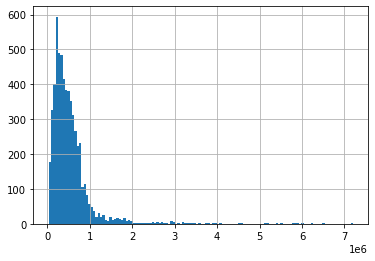

In [261]:
df['selling_price'].hist(bins=130);

Если посмотреть на распределение стоимости, то мы увидим что у него тяжелый правый хвост, который может повлиять на качество нашей модели

In [262]:
import math
import numpy as np

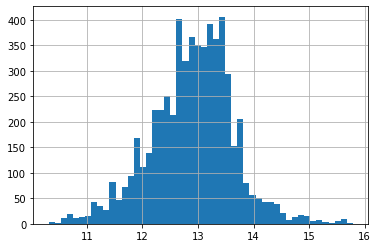

In [263]:
np.log(df['selling_price']).hist(bins=50);

Пока не будем логарифмировать стоимость автомобиля, но на этапе тренировки модели попробуем логарифмировать стоимость и посмотреть как это влияет на результат

## Обучение моделей

Для решения этой задачи я не буду перебирать все возможные модели.

Я решил попробовать следующие модели:

- Лес
- Бустинг
- XGBoost
- CatBoost

In [264]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [265]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


### Разделение на матрицу объект признак и таргет

Ниже мы взяли все признаки наших объектов и стоимость автомобиля которую будем предсказывать

In [266]:
X, y = df.drop(columns='selling_price'), df['selling_price']

In [267]:
cat_cols = X.columns[X.dtypes == 'object']
cat_cols

Index(['brand', 'model', 'fuel', 'seller_type'], dtype='object')

### Пайплайн

Пайплайн это удобная форма записи модели, с помощью которой можно работать с моделью и применять на нее функции, в которых есть fit и transform, ведь он позволяет применять его без нашего участия

In [268]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Напишем первый пайплайн для самой простой модели - линейной регрессии

In [269]:
p1 = Pipeline([
    ('target_encoder_', TargetEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression()),
])

Здесь мы задали порядок действий с нашими данными:

- Закодировать категориальные признаки
- Привести значения к одному размеру
- Использовать линейную регрессию

### Линейная регрессия

In [270]:
%%time
for i, pipe in enumerate([p1]):
    cv_res = cross_validate(pipe,
                            X,
                            y,
                            cv=5,
                            scoring='r2', n_jobs=-1
                           )
    print(f"Pipeline {i + 1}: mean cv r2 = {cv_res['test_score'].mean()}")

Pipeline 1: mean cv r2 = 0.6925210624792328
CPU times: total: 31.2 ms
Wall time: 2.65 s


Выше мы передали на кроссвалидацию наш пайплайн, кросс-валидация сама поделила данные на трейн и тест, все зафитила и дала нам предикт

Метрика качества R2 нашей линейной модели показала нам, что мы стоимость автомобиля предсказываем лучше, чем если бы просто предсказывали средним значением всех автомобилей

### Решающее дерево

Решающее дерево более сложная модель предсказания таргета, попробуем ее использовать из коробки, не подбирая никаких гиперпараметров

In [271]:
p2 = Pipeline([
    ('target_encoder_', TargetEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model', DecisionTreeRegressor()),
])

In [272]:
%%time
for i, pipe in enumerate([p2]):
    cv_res = cross_validate(pipe,
                            X,
                            y,
                            cv=5,
                            scoring='r2', n_jobs=-1
                           )
    print(f"Pipeline {i + 2}: mean cv r2 = {cv_res['test_score'].mean()}")

Pipeline 2: mean cv r2 = 0.8005843890835672
CPU times: total: 15.6 ms
Wall time: 975 ms


Видим, что наше дерево без подбора гиперпараметров показа скор R2=0.8, что уже лучше чем линейная модель

In [273]:
%%time
params = {'model__max_depth' : np.arange(2, 15, 1),
          'model__min_samples_leaf' : np.arange(1, 30, 1)}

gs = GridSearchCV(p2, params, cv=5, scoring='r2',n_jobs=-1)

gs.fit(X, y)
print(f"Лучшие параметры {gs.best_params_}\n mean cv r2 = {gs.best_score_}")

Лучшие параметры {'model__max_depth': 14, 'model__min_samples_leaf': 19}
 mean cv r2 = 0.8389915863330042
CPU times: total: 6.05 s
Wall time: 17.3 s


С помощью подбора гиперпараметров, улучшили нашу метрику до 0.84

### Случайный лес

Случайный лес - это применение нескольких деревьев для улучшения нашего предсказания

In [274]:
from sklearn.ensemble import RandomForestRegressor

In [275]:
p3 = Pipeline([
    ('target_encoder_', TargetEncoder(cols=cat_cols)),
    ('scaler_', StandardScaler()),
    ('model', RandomForestRegressor()),
])

In [276]:
%%time
for i, pipe in enumerate([p3]):
    cv_res = cross_validate(pipe,
                            X,
                            np.log(y),
                            cv=5,
                            scoring=('r2','neg_root_mean_squared_error'), n_jobs=-1
                           )
    print(f"Pipeline {i + 3}: mean cv r2 = {cv_res['test_r2'].mean()}\nPipeline {i + 3}")

Pipeline 3: mean cv r2 = 0.9123253886647283
Pipeline 3
CPU times: total: 15.6 ms
Wall time: 3.14 s


In [277]:
%%time
params = {'model__max_depth' : np.arange(2, 15, 1),
          'model__min_samples_leaf' : np.arange(1, 100, 4)}

gs = GridSearchCV(p3, params, cv=5, scoring='r2',n_jobs=-1)

gs.fit(X, np.log(y))
print(f"Лучшие параметры {gs.best_params_}\n mean cv r2 = {gs.best_score_}")

Лучшие параметры {'model__max_depth': 12, 'model__min_samples_leaf': 1}
 mean cv r2 = 0.9149468001526413
CPU times: total: 10.3 s
Wall time: 2min 21s


In [278]:
gs.best_params_

{'model__max_depth': 12, 'model__min_samples_leaf': 1}

## Полное обучение и сохранение модели в файл

Модель которая показала лучшую метрику мы выбрали, осталось обучить ее на всех данных и сохранить в файл для нашего сервиса

In [279]:
encoder = TargetEncoder()
encoder.fit(X,y)

TargetEncoder(cols=['brand', 'model', 'fuel', 'seller_type'])

In [280]:
X_tr = encoder.transform(X)

In [281]:
scal = StandardScaler()
scal.fit(X_tr)
X_tr = pd.DataFrame(scal.transform(X_tr),columns=X.columns)
X_tr.head()

,brand,model,year,km_driven,fuel,seller_type,transmission,owner,torque,seats,consumption,volume,power
0,-0.398446,-0.016701,0.089749,1.542034,0.910113,-0.338294,-0.306656,-0.669796,0.123820,-0.441117,0.971577,-0.373292,-0.436795
1,-0.023753,0.305052,0.089749,1.004747,0.910113,-0.338294,-0.306656,0.699696,0.633654,-0.441117,0.411871,0.135601,0.493606
2,-0.158594,0.144061,-0.939466,1.152237,0.910113,-0.338294,-0.306656,-0.669796,0.378737,-0.441117,0.872514,-0.072027,0.067487
3,-0.398446,-0.016701,-1.711376,1.004747,-1.078929,-0.338294,-0.306656,-0.669796,-0.530467,-0.441117,-0.836325,-0.271513,0.010756
4,-0.158594,0.032100,0.861660,-0.575509,-1.078929,-0.338294,-0.306656,-0.669796,-0.524094,-0.441117,0.164213,-0.477106,-0.189066


In [282]:
model = RandomForestRegressor(max_depth=12, min_samples_leaf=1)
model.fit(X_tr,np.log(y))

RandomForestRegressor(max_depth=12)

In [283]:
import pickle

In [284]:
with open('model.pickle','wb') as f:
  pickle.dump(model,f)

In [285]:
with open('encoder.pickle','wb') as f:
  pickle.dump(encoder,f)

In [286]:
with open('scal.pickle','wb') as f:
  pickle.dump(scal,f)